# House Price Prediction in Bengaluru

## Importing Python libraries

In [1]:
import pandas as pd
import numpy as sns
import seaborn as sns
import matplotlib.pyplot as plt
import time

print ("Libraries importing is sucessful")

Libraries importing is sucessful


## Loading the dataset

In [2]:
data = pd.read_csv("bangalore house price prediction OHE-data.csv")

In [3]:
data.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.tail()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
7115,3.0,2.0,325.00,2900.0,3,11206.896552,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7116,3.0,1.0,84.83,1780.0,3,4765.730337,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7117,2.0,1.0,48.00,880.0,2,5454.545455,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
7118,2.0,1.0,55.00,1000.0,2,5500.000000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7119,2.0,1.0,78.00,1400.0,3,5571.428571,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Preliminary data exploration

In [5]:
data.columns

Index(['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move',
       ...
       'location_Kalena Agrahara', 'location_Horamavu Agara',
       'location_Vidyaranyapura', 'location_BTM 2nd Stage',
       'location_Hebbal Kempapura', 'location_Hosur Road',
       'location_Horamavu Banaswadi', 'location_Domlur',
       'location_Mahadevpura', 'location_Tumkur Road'],
      dtype='object', length=108)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7120 entries, 0 to 7119
Columns: 108 entries, bath to location_Tumkur Road
dtypes: float64(5), int64(103)
memory usage: 5.9 MB


In [7]:
data.dtypes

bath                           float64
balcony                        float64
price                          float64
total_sqft_int                 float64
bhk                              int64
                                ...   
location_Hosur Road              int64
location_Horamavu Banaswadi      int64
location_Domlur                  int64
location_Mahadevpura             int64
location_Tumkur Road             int64
Length: 108, dtype: object

### Null values in the dataset

In [8]:
data.isnull().sum()

bath                           0
balcony                        0
price                          0
total_sqft_int                 0
bhk                            0
                              ..
location_Hosur Road            0
location_Horamavu Banaswadi    0
location_Domlur                0
location_Mahadevpura           0
location_Tumkur Road           0
Length: 108, dtype: int64

### Duplicate values in the dataset

In [9]:
data.duplicated().sum()

467

In [10]:
data = data.drop_duplicates()

In [11]:
data.duplicated().sum()

0

### Exploratory data analysis

#### Distribution of price_per_sqft

<Figure size 800x600 with 0 Axes>

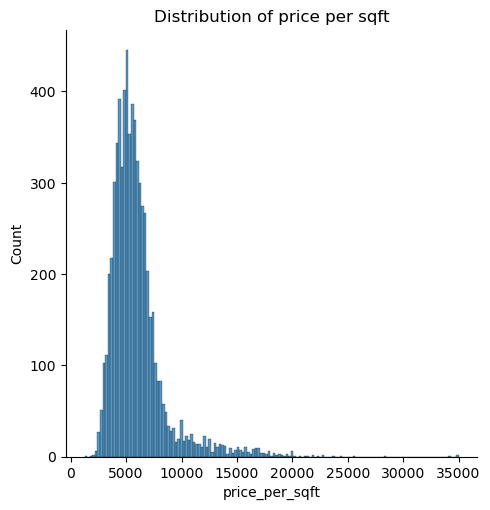

In [12]:
plt.figure(figsize = (8,6))
sns.displot(data = data, x = 'price_per_sqft')
plt.title("Distribution of price per sqft")
plt.savefig("D:/Top Mentor_Data analytics class/25-08-2024/Assignment/batch102assignments/KNN_Project_56/House Price/Distribution_price_sqft.png")
plt.show()

In [13]:
data['price_per_sqft'].skew()

2.956627950148559

#### Relationship between house price and sqft

<Figure size 600x400 with 0 Axes>

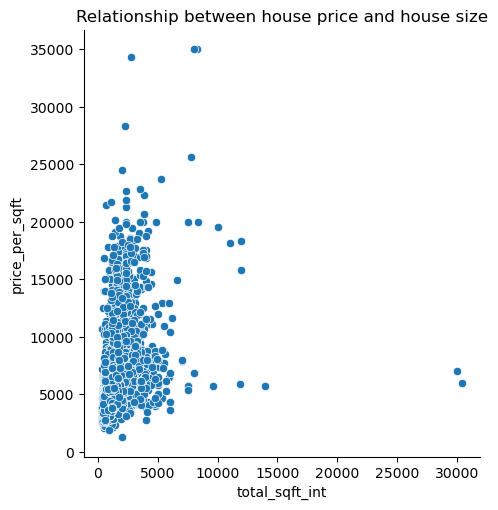

In [14]:
plt.figure(figsize = (6,4))
sns.relplot(data = data, x = 'total_sqft_int', y = 'price_per_sqft')
plt.title("Relationship between house price and house size")
plt.savefig("D:/Top Mentor_Data analytics class/25-08-2024/Assignment/batch102assignments/KNN_Project_56/House Price/Scatter plot.png")
plt.show()

#### Bar plot

<Figure size 600x400 with 0 Axes>

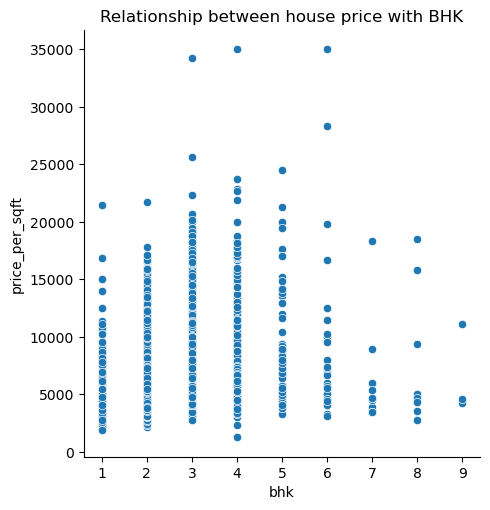

In [15]:
plt.figure(figsize = (6,4))
sns.relplot(data = data, x = 'bhk', y = 'price_per_sqft')
plt.title("Relationship between house price with BHK")
plt.savefig("D:/Top Mentor_Data analytics class/25-08-2024/Assignment/batch102assignments/KNN_Project_56/House Price/Bar plot.png")
plt.show()

### Identifying the best features

In [16]:
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [17]:
X = data.drop(columns=['price_per_sqft'])  # Feature matrix
y = data['price_per_sqft']  # Target variable

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print("Feature Importances from RandomForest:")
print(feature_importances.head(10))  # Top 10 features

Feature Importances from RandomForest:
price                            0.768865
total_sqft_int                   0.221077
bhk                              0.002515
balcony                          0.002235
bath                             0.001594
area_typePlot  Area              0.000738
area_typeSuper built-up  Area    0.000578
availability_Ready To Move       0.000361
location_Rajaji Nagar            0.000283
location_Koramangala             0.000259
dtype: float64


### KNN Regressor with n= 5

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [22]:
X = data[['price', 'total_sqft_int', 'bhk', 'balcony', 'bath', 'area_typeSuper built-up  Area', 'area_typePlot  Area']]

In [23]:
y = data['price_per_sqft']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1234)

In [25]:
X_train.shape

(5322, 7)

In [26]:
X_test.shape

(1331, 7)

In [27]:
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit (X_train, y_train)
knn_pred = knn.predict(X_test)
knn_r2 = r2_score(y_test, knn_pred)
knn_mse = mean_squared_error(y_test, knn_pred)
print (f"R-square value is: {knn_r2:.2f}")
print (f"MSE value is: {knn_mse:.3f}")
print (f"RMSE value is: {np.sqrt (knn_mse):.3f}")

R-square value is: 0.91
MSE value is: 689417.133
RMSE value is: 830.311


### KNN with Number of neighbors = 3

In [28]:
knn_3 = KNeighborsRegressor(n_neighbors = 3)
knn_3.fit (X_train, y_train)
knn_3_pred = knn_3.predict(X_test)
knn_3_r2 = r2_score(y_test, knn_3_pred)
knn_3_mse = mean_squared_error(y_test, knn_3_pred)
print (f"R-square value is: {knn_3_r2:.2f}")
print (f"MSE value is: {knn_3_mse:.3f}")
print (f"RMSE value is: {np.sqrt (knn_3_mse):.3f}")

R-square value is: 0.93
MSE value is: 564011.330
RMSE value is: 751.007
